# Predicting HDB Resale Price

Random Notes
- tabulate based on year and var
- plot histogram and density plots
- select columns more efficiently (X) 
- varience threshold - how to see variables that are dropped?

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 400000

In [132]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
os.chdir('D:/2020-12-15 Python Learning/HDB Resale Price')

In [67]:
df= pd.read_csv('./resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [115]:
# Quick overview of dataset
df.head()
df.info()
df.describe(include='all')
df.shape

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,floor_01 TO 03,floor_04 TO 06,floor_07 TO 09,floor_10 TO 12,floor_13 TO 15,floor_16 TO 18,floor_19 TO 21,floor_22 TO 24,floor_25 TO 27,floor_28 TO 30,floor_31 TO 33,floor_34 TO 36,floor_37 TO 39,floor_40 TO 42,floor_43 TO 45,floor_46 TO 48,floor_49 TO 51,year,mth
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,01
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,01
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,01
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,01
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94373 entries, 0 to 94372
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month                 94373 non-null  object 
 1   town                  94373 non-null  object 
 2   flat_type             94373 non-null  object 
 3   block                 94373 non-null  object 
 4   street_name           94373 non-null  object 
 5   storey_range          94373 non-null  object 
 6   floor_area_sqm        94373 non-null  float64
 7   flat_model            94373 non-null  object 
 8   lease_commence_date   94373 non-null  int64  
 9   remaining_lease       94373 non-null  object 
 10  resale_price          94373 non-null  float64
 11  town_ANG MO KIO       94373 non-null  uint8  
 12  town_BEDOK            94373 non-null  uint8  
 13  town_BISHAN           94373 non-null  uint8  
 14  town_BUKIT BATOK      94373 non-null  uint8  
 15  town_BUKIT MERAH   

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,floor_01 TO 03,floor_04 TO 06,floor_07 TO 09,floor_10 TO 12,floor_13 TO 15,floor_16 TO 18,floor_19 TO 21,floor_22 TO 24,floor_25 TO 27,floor_28 TO 30,floor_31 TO 33,floor_34 TO 36,floor_37 TO 39,floor_40 TO 42,floor_43 TO 45,floor_46 TO 48,floor_49 TO 51,year,mth
count,94373,94373,94373,94373,94373,94373,94373.000000,94373,94373.000000,94373,9.437300e+04,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373
unique,51,26,7,2503,552,17,NaN,20,NaN,634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,2018-07,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,94 years 09 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03
freq,2539,7763,39085,325,1397,21919,NaN,30864,NaN,740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9487
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.761932,NaN,1994.518623,NaN,4.459973e+05,0.044176,0.054295,0.019783,0.035052,0.038539,0.040382,0.002797,0.008297,0.041622,0.022877,0.024287,0.048266,0.022125,0.071609,0.028324,0.005923,0.030962,0.067964,0.027667,0.024541,0.082259,0.019857,0.066566,0.032658,0.071239,0.067933,0.179606,0.232259,0.210251,0.187077,0.093978,0.043307,0.018851,0.014051,0.007725,0.004864,0.002246,0.002140,0.002098,0.001049,0.000191,0.000223,0.000085,2018.727804,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,24.244536,NaN,13.107384,NaN,1.551477e+05,0.205487,0.226600,0.139255,0.183913,0.192493,0.196855,0.052817,0.090709,0.199725,0.149513,0.153938,0.214329,0.147091,0.257842,0.165897,0.076735,0.173216,0.251686,0.164017,0.154722,0.274760,0.139511,0.249270,0.177740,0.257224,0.251631,0.383861,0.422276,0.407489,0.389975,0.291800,0.203548,0.135998,0.117700,0.087550,0.069571,0.047343,0.046216,0.045757,0.032372,0.013809,0.014916,0.009207,1.248251,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,NaN,1.400000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1984.000000,NaN,3.350000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

(94373, 56)

In [29]:
# cat variables
cat_var=['flat_type','month']

for x in cat_var: 
    print(x)
    df[x].value_counts()
    df[x].value_counts(normalize=True)
    print('\n')

flat_type


4 ROOM              39085
5 ROOM              23722
3 ROOM              22458
EXECUTIVE            7587
2 ROOM               1432
MULTI-GENERATION       46
1 ROOM                 43
Name: flat_type, dtype: int64

4 ROOM              0.414154
5 ROOM              0.251364
3 ROOM              0.237971
EXECUTIVE           0.080394
2 ROOM              0.015174
MULTI-GENERATION    0.000487
1 ROOM              0.000456
Name: flat_type, dtype: float64



month


2018-07    2539
2021-01    2498
2020-12    2491
2020-09    2482
2020-07    2456
2020-06    2438
2020-10    2428
2020-08    2426
2020-11    2326
2019-10    2206
2021-02    2163
2019-07    2114
2021-03    2113
2019-05    2070
2018-08    2067
2018-10    1992
2018-09    1985
2017-11    1980
2017-05    1980
2018-06    1975
2017-08    1960
2020-03    1937
2019-04    1915
2020-01    1911
2019-11    1910
2017-03    1903
2019-08    1902
2019-06    1884
2018-03    1881
2018-11    1866
2019-12    1848
2017-04    1839
2018-04    1838
2019-09    1830
2017-10    1785
2017-07    1780
2017-06    1747
2018-05    1740
2017-09    1680
2020-02    1661
2019-03    1653
2017-12    1585
2019-01    1550
2018-12    1423
2019-02    1304
2017-01    1185
2018-02    1183
2017-02    1085
2018-01    1072
2020-04     424
2020-05     363
Name: month, dtype: int64

2018-07    0.026904
2021-01    0.026469
2020-12    0.026395
2020-09    0.026300
2020-07    0.026024
2020-06    0.025834
2020-10    0.025728
2020-08    0.025707
2020-11    0.024647
2019-10    0.023375
2021-02    0.022920
2019-07    0.022400
2021-03    0.022390
2019-05    0.021934
2018-08    0.021902
2018-10    0.021108
2018-09    0.021034
2017-11    0.020981
2017-05    0.020981
2018-06    0.020928
2017-08    0.020769
2020-03    0.020525
2019-04    0.020292
2020-01    0.020249
2019-11    0.020239
2017-03    0.020165
2019-08    0.020154
2019-06    0.019963
2018-03    0.019932
2018-11    0.019773
2019-12    0.019582
2017-04    0.019487
2018-04    0.019476
2019-09    0.019391
2017-10    0.018914
2017-07    0.018861
2017-06    0.018512
2018-05    0.018437
2017-09    0.017802
2020-02    0.017600
2019-03    0.017516
2017-12    0.016795
2019-01    0.016424
2018-12    0.015078
2019-02    0.013818
2017-01    0.012557
2018-02    0.012535
2017-02    0.011497
2018-01    0.011359
2020-04    0.004493


## Feature Engineering
1. In original dataset
    - year, month
    - Remaining lease
    - Storey range
    - Town dummies
    - floor area
2. Public Transprot
    - Distance to nearest MRT
    - Distance to nearest bus stop
    - Number of MRT/bus stop within 400m
    - Connectivity to the rest of the island (create an index)
3. Distance to food eateries
4. Distance to schools
5. Distance to express way

### 1) In Resale Price Dataset

In [30]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


#### Get year and month of resale

2017    20509
2018    21561
2019    22186
2020    23343
2021     6774
Name: year, dtype: int64

Number of resales in 2021 is low as data in 2021 is not complete.


<AxesSubplot:xlabel='year', ylabel='count'>

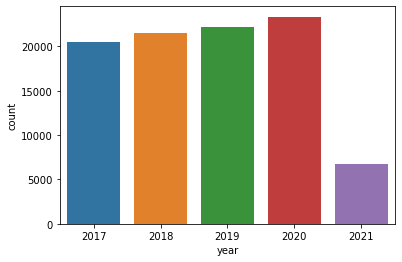

In [135]:
df[['year','mth']]=df['month'].str.split("-", expand=True) #expand=True outputs dataframe
df['year']=pd.to_numeric(df['year'])

df['year'].value_counts(dropna=False, sort=False)
print('Number of resales in 2021 is low as data in 2021 is not complete.')
# df.head()

sns.countplot(x=df['year'])
plt.show()

#### Remaining lease

In [55]:
df['remaining_lease_yr']= df['remaining_lease'].str[:2]
# df['remaining_lease_yr'].value_counts(dropna=False)

#### Flat type

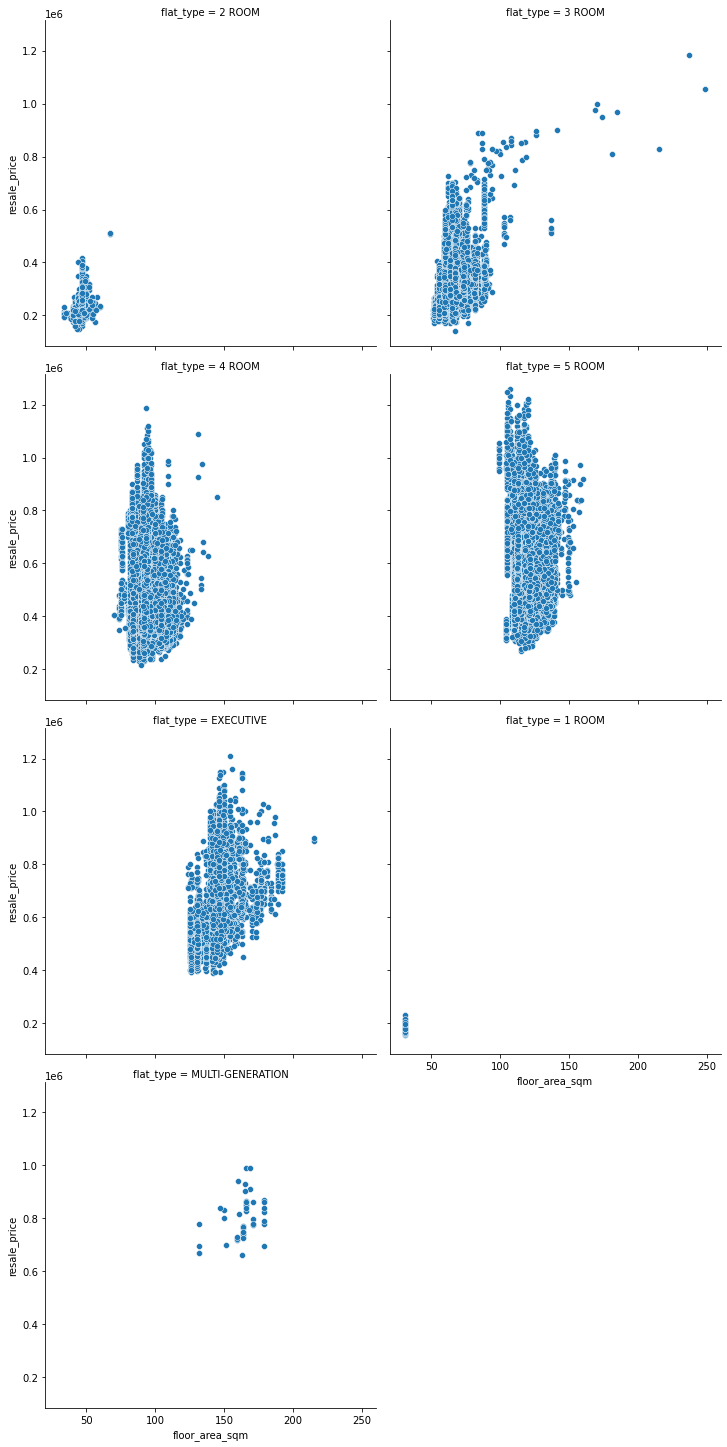

In [149]:
sns.relplot(x='floor_area_sqm'
          , y='resale_price'
          , data=df
          , kind='scatter'
          , col='flat_type'
          , col_wrap=3
          , col_order['xxxxxx'])
plt.show()

#### Storey Range

In [72]:
floor_dum=pd.get_dummies(df['storey_range'], prefix='floor', prefix_sep="_")
df= pd.concat([df, floor_dum], axis=1)

#### Town Dummies

In [69]:
print('Number of unique towns:')
df['town'].nunique()
df['town'].unique()

Number of unique towns:


26

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [70]:
town_dum=pd.get_dummies(df['town'], prefix='town', prefix_sep="_")
df= pd.concat([df, town_dum], axis=1)

#### Floor Area

In [ ]:
df['floor_area_sqm']=pd.to_numeric(df['floor_area_sqm'])

df['floor_area_sqm'].value_counts(sort=False).sort_index()

<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

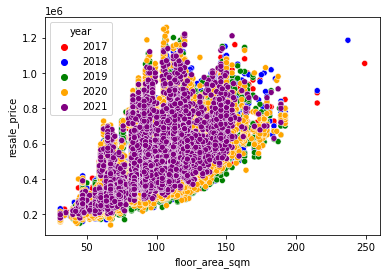

In [143]:
hue_colors= {2017:'red'
            , 2018:'blue'
             , 2019:'green'
             , 2020:'orange'
             , 2021:'purple'
            }
sns.scatterplot(x='floor_area_sqm'
                , y='resale_price'
                , data=df, hue='year'
                , palette=hue_colors)
plt.show()

#### Get geospatial coordinate of all flats

### Public Transport

## Combine datasets for modelling

In [83]:
df_comb= df

## Data Cleaning
1. Select X and Y variables
2. Check all features for missing values
3. Features with zero variation in entire dataset will be removed.
4. Features with low variance (<0.1) will be removed. This is not a hard and fast rule, hence the list of features with low varience are checked to ensure no features with important predictive ability are dropped.

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.feature_selection import VarianceThreshold
import eli5
from eli5.sklearn import PermutationImportance

In [88]:
df_clean= df_comb
df_clean.shape
df_clean.head()

(94373, 54)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,floor_01 TO 03,floor_04 TO 06,floor_07 TO 09,floor_10 TO 12,floor_13 TO 15,floor_16 TO 18,floor_19 TO 21,floor_22 TO 24,floor_25 TO 27,floor_28 TO 30,floor_31 TO 33,floor_34 TO 36,floor_37 TO 39,floor_40 TO 42,floor_43 TO 45,floor_46 TO 48,floor_49 TO 51
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
# Features
df_clean.columns
X = df_clean.drop(['month','town','flat_type','street_name','block','storey_range','flat_model','lease_commence_date', 'remaining_lease','resale_price'],axis=1)

y= df['resale_price']

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'town_ANG MO KIO', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'floor_01 TO 03', 'floor_04 TO 06', 'floor_07 TO 09', 'floor_10 TO 12',
       'floor_13 TO 15', 'floor_16 TO 18', 'floor_19 TO 21', 'floor_22 TO 24',
       'floor_25 TO 27', 'floor_28 TO 30', 'floor_31 TO 33', 'floor_34 TO 36',
       'floor_37 TO 39', 'floor_40 TO 42', 'floor_4

#### Check for missing values

In [96]:
# % of missing.
for col in X.columns:
    pct_missing = np.mean(X[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

block - 0%
floor_area_sqm - 0%
flat_model - 0%
resale_price - 0%
town_ANG MO KIO - 0%
town_BEDOK - 0%
town_BISHAN - 0%
town_BUKIT BATOK - 0%
town_BUKIT MERAH - 0%
town_BUKIT PANJANG - 0%
town_BUKIT TIMAH - 0%
town_CENTRAL AREA - 0%
town_CHOA CHU KANG - 0%
town_CLEMENTI - 0%
town_GEYLANG - 0%
town_HOUGANG - 0%
town_JURONG EAST - 0%
town_JURONG WEST - 0%
town_KALLANG/WHAMPOA - 0%
town_MARINE PARADE - 0%
town_PASIR RIS - 0%
town_PUNGGOL - 0%
town_QUEENSTOWN - 0%
town_SEMBAWANG - 0%
town_SENGKANG - 0%
town_SERANGOON - 0%
town_TAMPINES - 0%
town_TOA PAYOH - 0%
town_WOODLANDS - 0%
town_YISHUN - 0%
floor_01 TO 03 - 0%
floor_04 TO 06 - 0%
floor_07 TO 09 - 0%
floor_10 TO 12 - 0%
floor_13 TO 15 - 0%
floor_16 TO 18 - 0%
floor_19 TO 21 - 0%
floor_22 TO 24 - 0%
floor_25 TO 27 - 0%
floor_28 TO 30 - 0%
floor_31 TO 33 - 0%
floor_34 TO 36 - 0%
floor_37 TO 39 - 0%
floor_40 TO 42 - 0%
floor_43 TO 45 - 0%
floor_46 TO 48 - 0%
floor_49 TO 51 - 0%


#### Drop Features with Zero Variation 

In [98]:
print('These features have 0 variations and will be removed:')
X.columns[X.nunique() == 1]
X.drop(columns = X.columns[X.nunique() == 1],inplace = True)

These features have 0 variations and will be removed:


Index([], dtype='object')

#### Drop features with Little Variation

In [108]:
# # X.var()

# # define the transform
# # default threshold parameter is 0, can be set to any float value. All features with variance below this threshold will be removed
# selector = VarianceThreshold(threshold = 0.1)

# # fit the defined transform on training dataset
# selector.fit(X)

# X = pd.DataFrame(selector.transform(X), columns = X.columns[selector.get_support(indices=False)])

VarianceThreshold(threshold=0.1)

Index(['floor_area_sqm', 'resale_price', 'floor_01 TO 03', 'floor_04 TO 06',
       'floor_07 TO 09', 'floor_10 TO 12'],
      dtype='object')

### Overview of variables used in model

In [111]:
print('Final list of X features:')
X.columns
print('\n')
print('Double check number of rows and columns of final dataset:')
X.shape
print('\n')
print('Quick summary stats of final list of features:')
X.describe()

Final list of X features:


Index(['floor_area_sqm', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'floor_01 TO 03', 'floor_04 TO 06',
       'floor_07 TO 09', 'floor_10 TO 12', 'floor_13 TO 15', 'floor_16 TO 18',
       'floor_19 TO 21', 'floor_22 TO 24', 'floor_25 TO 27', 'floor_28 TO 30',
       'floor_31 TO 33', 'floor_34 TO 36', 'floor_37 TO 39', 'floor_40 TO 42',
       'floor_43 TO 45', 'floor_46 TO 48', 'floor_49 TO 51'],
      dtype='object')



Double check number of rows and columns of final dataset:


(94373, 44)



Quick summary stats of final list of features:


,floor_area_sqm,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,floor_01 TO 03,floor_04 TO 06,floor_07 TO 09,floor_10 TO 12,floor_13 TO 15,floor_16 TO 18,floor_19 TO 21,floor_22 TO 24,floor_25 TO 27,floor_28 TO 30,floor_31 TO 33,floor_34 TO 36,floor_37 TO 39,floor_40 TO 42,floor_43 TO 45,floor_46 TO 48,floor_49 TO 51
count,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000,94373.000000
mean,97.761932,0.044176,0.054295,0.019783,0.035052,0.038539,0.040382,0.002797,0.008297,0.041622,0.022877,0.024287,0.048266,0.022125,0.071609,0.028324,0.005923,0.030962,0.067964,0.027667,0.024541,0.082259,0.019857,0.066566,0.032658,0.071239,0.067933,0.179606,0.232259,0.210251,0.187077,0.093978,0.043307,0.018851,0.014051,0.007725,0.004864,0.002246,0.002140,0.002098,0.001049,0.000191,0.000223,0.000085
std,24.244536,0.205487,0.226600,0.139255,0.183913,0.192493,0.196855,0.052817,0.090709,0.199725,0.149513,0.153938,0.214329,0.147091,0.257842,0.165897,0.076735,0.173216,0.251686,0.164017,0.154722,0.274760,0.139511,0.249270,0.177740,0.257224,0.251631,0.383861,0.422276,0.407489,0.389975,0.291800,0.203548,0.135998,0.117700,0.087550,0.069571,0.047343,0.046216,0.045757,0.032372,0.013809,0.014916,0.009207
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,249.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

## Modelling

In [112]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [127]:
# Linear regression #
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Create regression: reg
reg= LinearRegression()

# Compute 5 fold cross validation
cv_results= cross_val_score(reg, X_train, y_train, cv=5) #score computed is R sq#
print('Individual CV scores:')
print(cv_results)
print('Avg 5-fold CV score')
np.mean(cv_results)

# Fit the model to the data
reg.fit(X_train, y_train)

# Compute predictions over the prediction space: y_pred
y_pred= reg_all.predict(X_test)

# R sq & RMSE
print('R squared')
reg.score(X_test, y_test)
print('RMSE')
np.sqrt(mean_squared_error(y_test, y_pred))

Individual CV scores:
[0.73894344 0.73954069 0.73998131 0.73945298 0.73903979]
Avg 5-fold CV score


0.739391640727108

LinearRegression()

R squared


0.7387586894025592

RMSE


78394.51369569215

In [131]:
# Regularised regression
# tps://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/regression-2?ex=11

from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred= ridge.predict(X_test)
ridge.score(X_test,y_test)

Ridge(alpha=0.1, normalize=True)

0.7317620362893089

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
names= 
lasso= Lasso(alpha=0.1)
lasso_coef= lasso.fit(X, y).coef_
_= plt.plot(range)xxxxx

In [ ]:
# hyperparameter tuning


In [113]:
# Run 3 models and compare the ROC AUC
# Then output the feature importance metric and 

dfs = []
weights= []
pdps=[]
models = [
        ('RF', RandomForestClassifier())
        ,('XGB', XGBClassifier(use_label_encoder=False))

        ]
results = []
names = []
scoring = ['accuracy', 'roc_auc']
target_names = ['churn', 'no_churn']

for name, model in models:
    print("----------Model:"+name+"----------")
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Get AUC (on test set)')
    roc_auc_score(y_test, y_pred)
       
    print('get results from k fold runs')
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    dfs_final = pd.concat(dfs, ignore_index=True)
    
    print('get feature importance:')
    perm = PermutationImportance(clf, scoring="roc_auc", random_state=1).fit(X_test, y_test)
    this_weight= eli5.explain_weights_df(perm, feature_names = X_test.columns.tolist())
    this_weight['model'] = name
    weights.append(this_weight)
    weights_final = pd.concat(weights, ignore_index=True)
    
    print('get pdp')
    for x in X.columns:
        print('col: '+x)
        pdp, axes=partial_dependence(clf, X_test, features=x)

        this_pdpdf=pd.DataFrame(pdp.T, axes, columns=["d_churn"])
        this_pdpdf = this_pdpdf.rename_axis('feature_value').reset_index()

        this_pdpdf['feature']=x
        this_pdpdf['model']=name
        pdps.append(this_pdpdf)

        final_pdpdf= pd.concat(pdps, ignore_index=True)
    
    print('-------------------------------')
    

----------Model:RF----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 559, in _validate_y_class_weight
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\ProgramData\A

ValueError: Unknown label type: 'continuous'